# __Coffee Shop Sales Analysis__


## Introduction
This Jupyter Notebook analyzes transaction data from A Coffee Shop to uncover the reasons behind inconsistent sales performance. Management currently lacks clarity on how factors like payment methods, customer timing, and product mix influence overall revenue. By examining attributes such as time of day, day of the week, month, and customer preferences within the sales records, this analysis aims to identify clear customer behavior trends and key sales patterns. The ultimate goal is to provide actionable insights that will help The Coffee Shop's management optimize operations, maximize revenue during peak periods, and stabilize business flow during slower times. To know more about the dataset [click here](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset?resource=download)

## 1. Business Understanding
Brew Haven Coffee's management noticed that sales feel inconsistent: some months they are packed, while other times business is slow. They are also unsure whether payment methods, customer timing, or product mix are impacting revenue. The dataset used to solve the issues contains coffee shop transaction records, including details about sales, payment type, time of purchase, and customer preferences.
With attributes covering time of day, weekdays, months, coffee types, and revenue, this dataset provides a strong foundation for analyzing customer behavior, sales patterns, and business performance trends.

### Research Questions 
1. Which product brings more revenue?
2. Do trends depend on the day of the week, month or time of the day?
3. Are there patterns in purchase preferences?(Segment the customers and the products)

### Objectives
1. To find out which product brings more revenue
2. To find out if trends depend on the day of the week, month or time of the day
3. To find out the patterns in purchase preferences


## 2. Data Understanding
Columns (features):

- hour_of_day → Hour of purchase (0–23)
- cash_type → Mode of payment (cash / card)
- money → Transaction amount (in local currency)
- coffee_name → Type of coffee purchased (e.g., Latte, Americano, Hot Chocolate)
- Time_of_Day → Categorized time of purchase (Morning, Afternoon, Night)
- Weekday → Day of the week (e.g., Mon, Tue, …)
- Month_name → Month of purchase (e.g., Jan, Feb, Mar)
- Weekdaysort → Numeric representation for weekday ordering (1 = Mon, 7 = Sun)
- Monthsort → Numeric representation for month ordering (1 = Jan, 12 = Dec)
- Date → Date of transaction (YYYY-MM-DD)
- Time → Exact time of transaction (HH:MM:SS)

Use Cases-
Power BI / Tableau dashboards
Python data visualization (Matplotlib, Seaborn, Plotly)
Data storytelling projects
Business intelligence & decision-making simulations
Training projects for beginners in data visualization & analytics

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# enhances my visuals
# Set global style
plt.style.use('dark_background')  # Black background

# Custom rcParams (global settings)
plt.rcParams.update({
    "axes.edgecolor": "white",     # Axis border
    "axes.labelcolor": "white",    # X/Y labels
    "xtick.color": "white",        # X ticks
    "ytick.color": "white",        # Y ticks
    "text.color": "white",         # Default text
    "legend.edgecolor": "white",   # Legend border
    "figure.facecolor": "black",   # Figure background
    "axes.facecolor": "black",     # Plot background

# Global rcParams (applies to all plots)

    # Enhancements
    "axes.titlesize": 16,            # Bigger title
    "axes.titleweight": "bold",      # Bold title
    "axes.labelsize": 12,            # Bigger axis labels
    "xtick.labelsize": 10,           # Bigger tick labels
    "ytick.labelsize": 10,
    "legend.fontsize": 10,           # Bigger legend
    "legend.loc": "upper center",    # Legend on top (by default)
})


### Data Exploration

#### load the datasets

In [4]:
df = pd.read_csv("data/Coffe_sales.csv")
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [ ]:
"""
it has 3547 entries, 11 columns.
the Dtypes are :- int64
                  object
                  float64
But date and time are classified as object which is not cool
"""

In [6]:
# check for null values
df.isnull().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [ ]:
"""
There are no null values
"""

In [7]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [8]:
list(df)

['hour_of_day',
 'cash_type',
 'money',
 'coffee_name',
 'Time_of_Day',
 'Weekday',
 'Month_name',
 'Weekdaysort',
 'Monthsort',
 'Date',
 'Time']

In [9]:
df["cash_type"].unique()

array(['card'], dtype=object)

In [10]:
df['coffee_name'].unique()

array(['Latte', 'Hot Chocolate', 'Americano', 'Americano with Milk',
       'Cocoa', 'Cortado', 'Espresso', 'Cappuccino'], dtype=object)

In [ ]:
"""
They deal with:-'Latte',
                'Hot Chocolate',
                'Americano',
                'Americano with Milk',
                'Cocoa', 
                'Cortado',
                'Espresso',
                'Cappuccino'
"""

In [11]:
df["Weekday"].unique()

array(['Fri', 'Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu'], dtype=object)

In [ ]:
"""
they work everyday including weekends.
"""

#### which is the best selling product according to time of day?

In [12]:
df2 = df.groupby("coffee_name")["Time_of_Day"].value_counts()
df2 = pd.DataFrame(df2)
df2

count
coffee_name         Time_of_Day       
Americano           Afternoon      233
                    Morning        219
                    Night          112
Americano with Milk Morning        331
                    Afternoon      239
                    Night          239
Cappuccino          Night          200
                    Afternoon      164
                    Morning        122
Cocoa               Night          106
                    Afternoon       75
                    Morning         58
Cortado             Morning        143
                    Afternoon       88
                    Night           56
Espresso            Afternoon       56
                    Morning         44
                    Night           29
Hot Chocolate       Night          147
                    Afternoon       80
                    Morning         49
Latte               Night          272
                    Afternoon      270
                    Morning        215

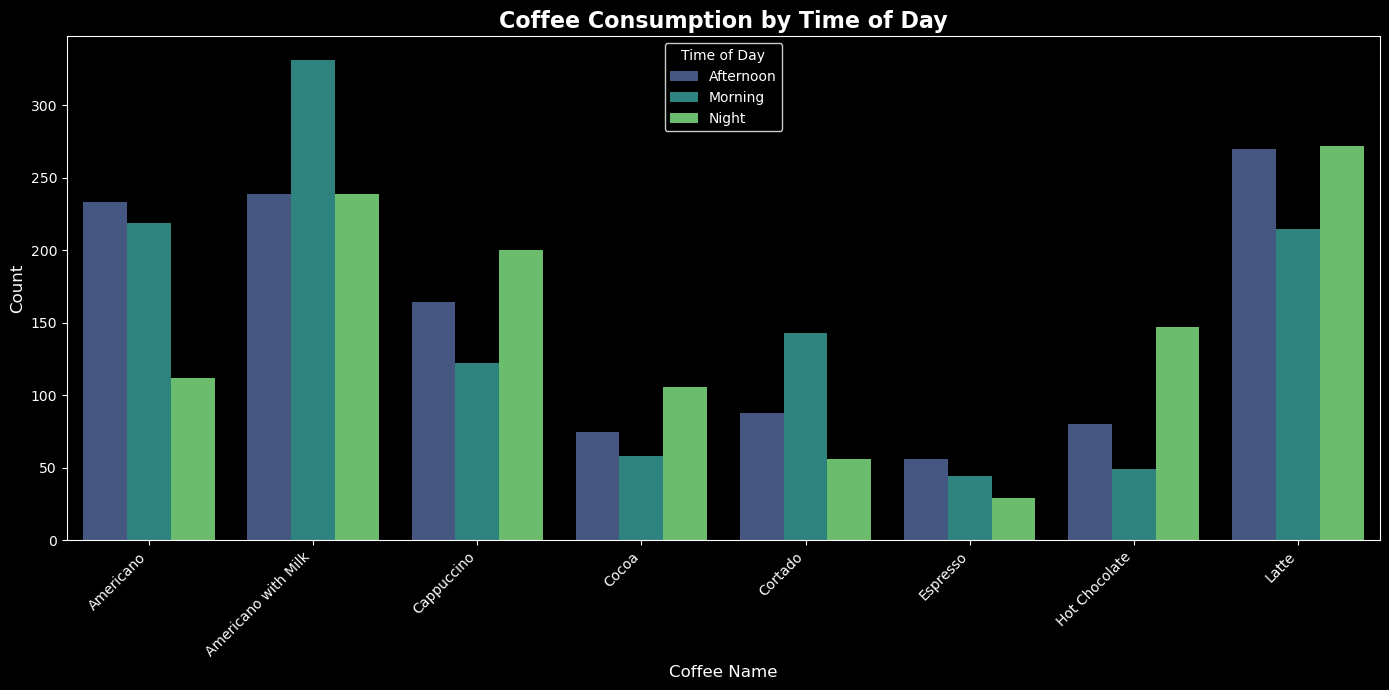

In [13]:
fig, ax = plt.subplots(figsize = (14, 7))

sns.barplot(x= "coffee_name", data = df2, y ="count", hue= "Time_of_Day", palette='viridis', ax=ax)

plt.title('Coffee Consumption by Time of Day')
plt.xlabel('Coffee Name')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Time of Day')
plt.tight_layout()
plt.show()

In [ ]:
"""
Americano with Milk	has the highest sales in the morning, followed by lattee which is bought mostly in the afternoon and at night.
"""

## 3. Data Preparation

In [14]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


#### We saw the dtype for the date and time was object lets work on that. Change the dtype to ``` datetime64[ns]```

In [15]:
df["Date"] = pd.to_datetime(df["Date"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 304.9+ KB


Now everything is fixed and in the right dtype

## 4. Data Analysis and Visualisation

#### (i) To find out which product brings more revenue
#### (ii) To find out if trends depend on the day of the week, month or time of the day
#### (iii) To find out the patterns in purchase preferences(Segment the customers and the products)

### (i) To find out which product brings more revenue

In [17]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [18]:
prod_rev = df.groupby('coffee_name')['money'].sum().reset_index()
type(prod_rev)

pandas.core.frame.DataFrame

In [19]:
prod_rev.sort_values("money")

,coffee_name,money
5,Espresso,2690.28
4,Cortado,7384.86
3,Cocoa,8521.16
6,Hot Chocolate,9933.46
0,Americano,14650.26
2,Cappuccino,17439.14
1,Americano with Milk,24751.12
7,Latte,26875.30


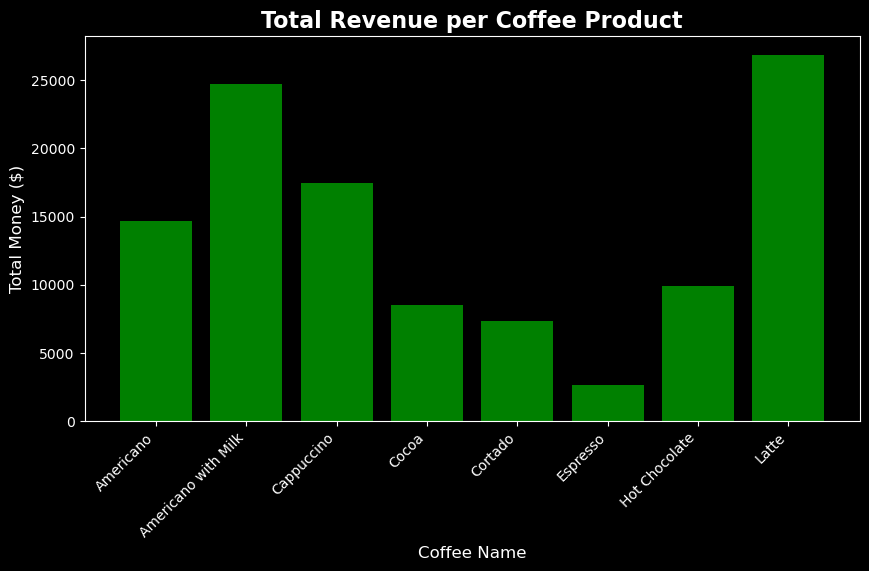

In [20]:
fig, ax = plt.subplots(figsize= (10,5))

ax.bar(x="coffee_name", data = prod_rev, height = "money", color = "green")

# Add labels and a title to make the plot easy to understand.
ax.set_xlabel('Coffee Name')
ax.set_ylabel('Total Money ($)')
ax.set_title('Total Revenue per Coffee Product')

# Ensure the labels on the x-axis are readable.

ax.set_xticks(ticks=prod_rev['coffee_name'],labels= prod_rev['coffee_name'], rotation=45, ha='right')



plt.show()

In [ ]:
"""
The products that bring more revenue are -: - Latte	26875.30
                                            - Americano with Milk	24751.12
                                            - Cappuccino	17439.14
                                            
"""

### (ii) To find out if trends depend on the day of the week, month or time of the day?

In [22]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [26]:
df['coffee_name'].value_counts().sort_values(ascending= False)

coffee_name
Americano with Milk    809
Latte                  757
Americano              564
Cappuccino             486
Cortado                287
Hot Chocolate          276
Cocoa                  239
Espresso               129
Name: count, dtype: int64

In [27]:
df5 = df.groupby('hour_of_day')['money'].sum().reset_index()
df6 = df.groupby('Weekdaysort')['money'].sum().reset_index()
df7 = df.groupby('Monthsort')['money'].sum().reset_index()

In [28]:
df5 = df5.sort_values("money")
df6 = df6.sort_values("money")
df7 = df7.sort_values("money")

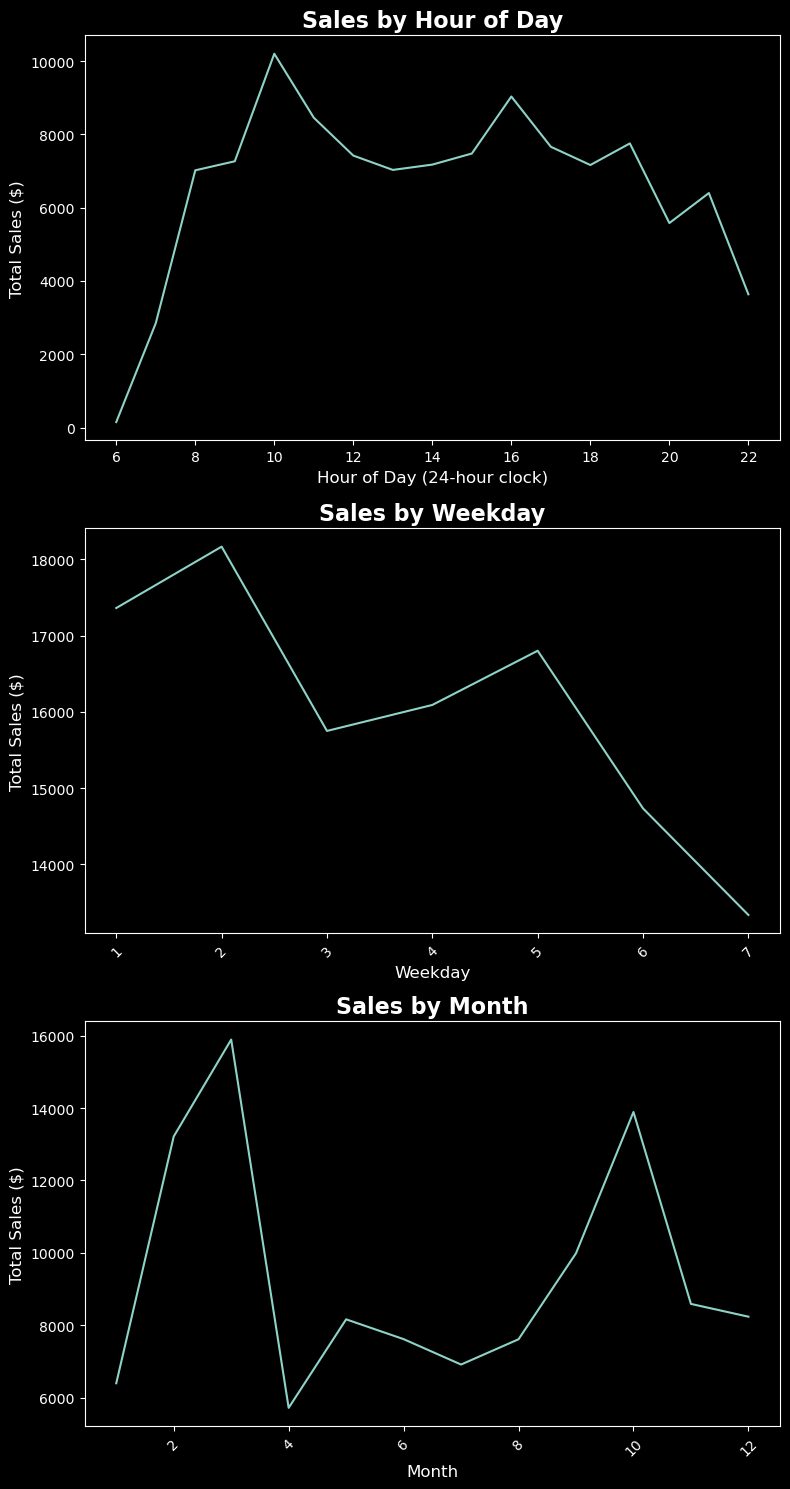

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(8, 15))

# Plot the sales by hour of day
sns.lineplot(x='hour_of_day', y='money', data=df5, ax=ax1)
ax1.set_title('Sales by Hour of Day')
ax1.set_xlabel('Hour of Day (24-hour clock)')
ax1.set_ylabel('Total Sales ($)')

# Plot the sales by weekday
sns.lineplot(x='Weekdaysort', y='money', data=df6, ax=ax2)
ax2.set_title('Sales by Weekday')
ax2.set_xlabel('Weekday')
ax2.set_ylabel('Total Sales ($)')
ax2.tick_params(axis='x', rotation=45)

# Plot the sales by month
sns.lineplot(x='Monthsort', y='money', data=df7, ax=ax3)
ax3.set_title('Sales by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Total Sales ($)')
ax3.tick_params(axis='x', rotation=45)

# Improve layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
"""
Yes! trends do depend on the day of the week, month or time of the day.
Sales are higher on march, october and february than april, january and july.
Sales are higher on Tuesday, Monday and Friday than on Sundays
Sales are higher at 10 am 

"""

### (iii) To find out the patterns in purchase preferences?(Segment the customers and the products)

In [30]:
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


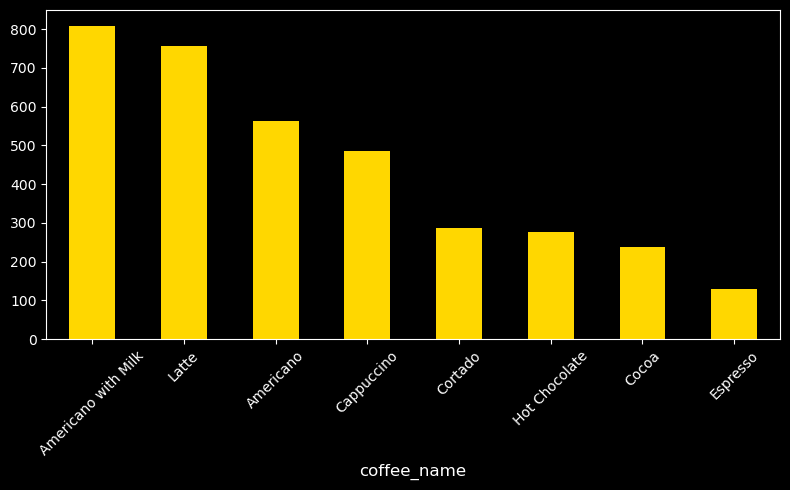

In [49]:
df["coffee_name"].value_counts().plot(kind="bar", color = "gold", figsize = (8, 5))

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

## 5.Conclusion
This analysis of coffee sales, grouped by coffee product and time of day, shows clear consumption patterns that influence peak demand.

__Morning Dominance:__ Americano with Milk is the top morning seller, driven by customers seeking a substantial, milk-based caffeinated drink to start their day.

__Afternoon & Night Preference:__ The Latte maintains a high sales volume across all periods, often leading in the Afternoon and Night, demonstrating its status as the most consistently popular, all-day choice.

__Hot Beverage Niche:__ Non-coffee beverages like Hot Chocolate and Cocoa show their highest relative popularity during the Night, indicating a demand for comfort and non-caffeinated options later in the evening.

Opportunity for Growth: Simpler, espresso-focused drinks like Espresso and Cortado have the lowest overall counts, suggesting an opportunity to promote these items or review their placement and pricing.

Trends do depend on the day of the week, month or time of the day.
- Sales are higher on march, october and february than april, january and july.
- Sales are higher on Tuesday, Monday and Friday than on Sundays
- Sales are higher at 10 am

The best selling products are  -: - Latte	26875.30
                                - Americano with Milk	24751.12
                                - Cappuccino	17439.14
                                            

## 6. Recommendation
To maximize revenue and efficiency-:

* __Morning Rush:__ Prioritize Americano with Milk and its ingredients (milk and espresso shots) for immediate access. 

* __All-Day Staple:__ Ensure Latte ingredients and staffing are robust, especially from the Afternoon into Night, as it is the most consistent top earner.

* __Peak Time Staffing:__ Focus scheduling efforts to ensure maximum staff availability around the 10 AM peak hour, and on Tuesday, Monday, and Friday, * which are the highest sales days.

*  Concentrate major marketing campaigns and limited-time offers during the peak months of March, October, and February to capitalize on existing high demand.
*  Actively promote Hot Chocolate and Cocoa in the evenings.

### Citations
Coffee Sales Dataset

Coffee Sales Transactional datasets

Available on Kaggle

License : This dataset is released under the [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)